In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import scipy.stats as st
import numpy as np

In [38]:
df = pd.read_csv('mtcars.csv')

In [39]:
df.drop("drop", axis='columns', inplace=True)

In [40]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 2.9 KB


In [42]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [43]:
scaler = StandardScaler()
to_scale = [
    'mpg',
    'disp',
    'hp',
    'drat',
    'wt',
    'qsec',
]

df[to_scale] = scaler.fit_transform(df[to_scale])

In [44]:
categorical = [
    'cyl',
    'vs',
    'am',
    'gear',
    'carb'
]

df[categorical] = df[categorical].astype('category')

In [45]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,0.153299,6,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,0,1,4,4
1,0.153299,6,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,0,1,4,4
2,0.456737,4,-1.006026,-0.795570,0.481584,-0.931678,0.432823,1,1,4,1
3,0.220730,6,0.223615,-0.543655,-0.981576,-0.002336,0.904736,1,0,3,1
4,-0.234427,8,1.059772,0.419550,-0.848562,0.231297,-0.471202,0,0,3,2


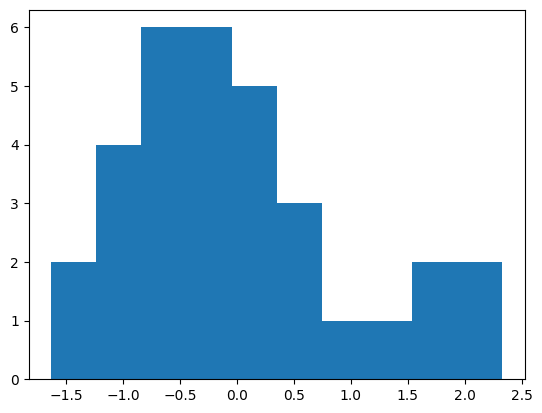

In [46]:
plt.hist(df['mpg'], bins=10)
plt.show()

In [47]:
df.index

RangeIndex(start=0, stop=32, step=1)

In [48]:
df_sort = df.sort_values('mpg', ignore_index=True)
df_sort

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,-1.633610,8,1.879533,1.012291,-1.133593,2.291423,-0.016346,0,0,3,4
1,-1.633610,8,1.977904,0.864106,-1.266608,2.110747,0.074625,0,0,3,4
2,-1.144739,8,0.977795,1.456847,0.253559,0.646645,-1.386598,0,0,3,4
3,-0.976163,8,1.059772,1.456847,-0.734549,0.366285,-1.142114,0,0,3,4
4,-0.908732,8,1.715580,1.234569,-0.696545,2.209392,-0.243774,0,0,3,4
5,-0.858159,8,0.576113,2.790515,-0.107481,0.366285,-1.847139,0,1,5,8
6,-0.824444,8,0.369533,0.493642,-1.000578,0.584343,0.085996,0,0,3,3
7,-0.824444,8,0.600705,0.049086,-0.848562,0.226105,-0.312002,0,0,3,2
8,-0.773871,8,0.715472,0.049086,-1.589643,0.314367,-0.556487,0,0,3,2
9,-0.723298,8,0.985993,1.738399,1.184661,-0.049063,-1.903996,0,1,5,4


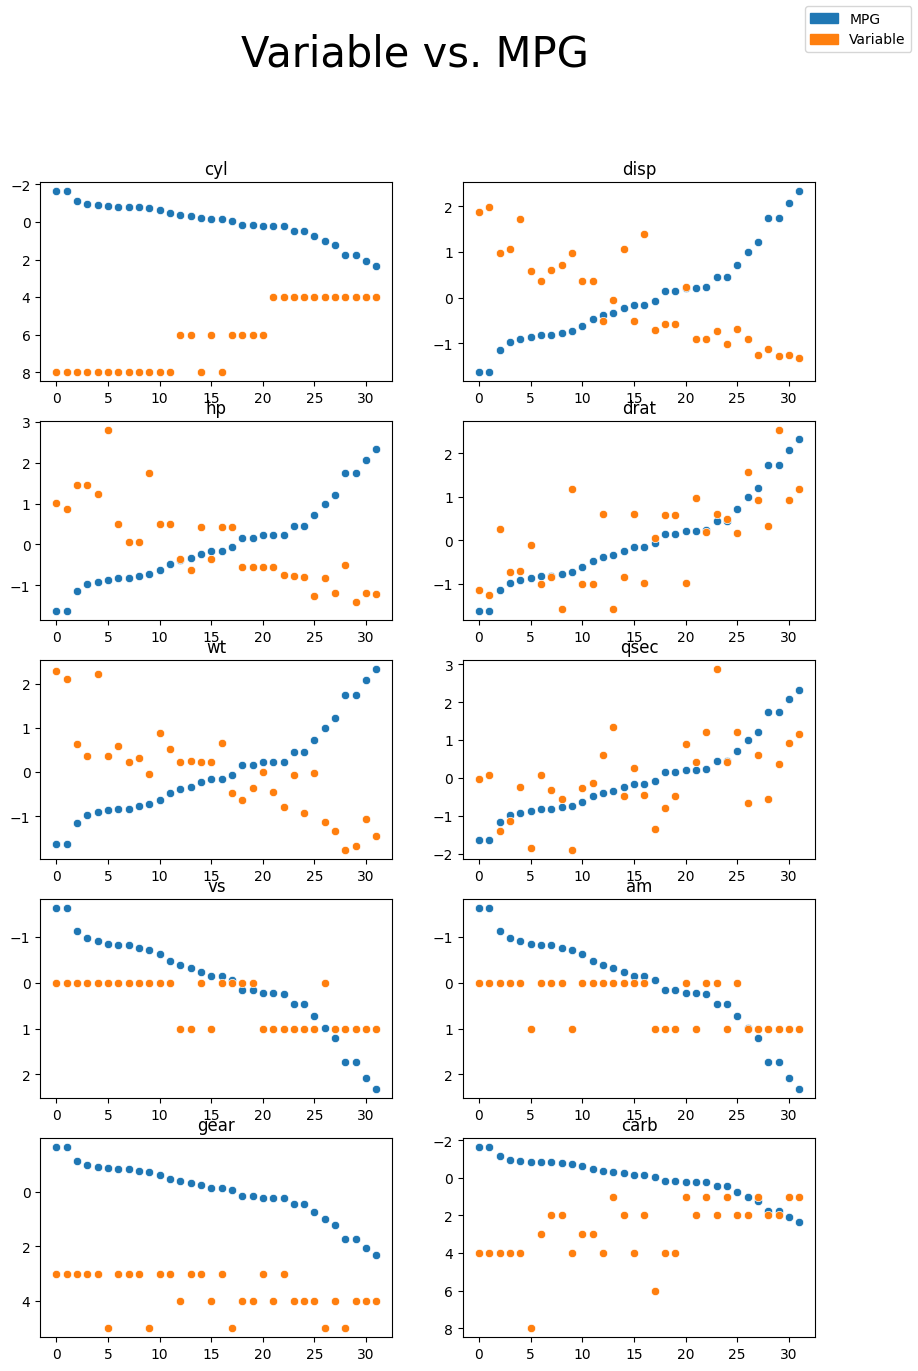

In [49]:
fig, axs = plt.subplots(5, 2)
fig.set_size_inches(10, 15)
fig.suptitle('Variable vs. MPG', fontsize=30)

axs = axs.flatten()

ax_idx = 0
for col in df.columns:
    if col == 'mpg': continue

    sns.scatterplot(ax=axs[ax_idx], data=df_sort, x=df.index, y='mpg')
    sns.scatterplot(ax=axs[ax_idx], data=df_sort, x=df.index, y=col)

    axs[ax_idx].set_xlabel(None)
    axs[ax_idx].set_ylabel(None)
    axs[ax_idx].title.set_text(col)

    ax_idx += 1

fig.legend(handles=[
    mpatches.Patch(color='tab:blue', label='MPG'),
    mpatches.Patch(color='tab:orange', label='Variable')
])

plt.show()

In [50]:
sig_num = {column : st.linregress(df[column], df['mpg']).pvalue for column in to_scale if not column == 'mpg'}
sig_num

{'disp': 9.380326537381499e-10,
 'hp': 1.787835254121062e-07,
 'drat': 1.7762399287524028e-05,
 'wt': 1.2939587013504974e-10,
 'qsec': 0.017081988496519634}

In [51]:
def kruskal_column(data: pd.DataFrame, colname: str, against: str):
    samples_by_group = []
    for value in set(data[colname]):
        mask = data[colname] == value
        samples_by_group.append(data[against][mask])
        
    _, p = st.kruskal(*samples_by_group)
    return p

In [52]:
sig_cat = { column : kruskal_column(df, column, 'mpg') for column in categorical }
sig_cat

{'cyl': 2.5662167953453414e-06,
 'vs': 8.34866116201664e-05,
 'am': 0.0017533351106512793,
 'gear': 0.0007757547276206059,
 'carb': 0.007013125987054205}

In [53]:
predictive = [
    'cyl',
    'vs',
    'am',
    'gear',
    'disp',
    'hp',
    'drat'
]

In [54]:
def lr_r2(X, y):
    lr = LinearRegression()
    lr = lr.fit(X, y)
    return lr, lr.score(X, y)

In [55]:
base_lr, base_r2 = lr_r2(X=df.drop('mpg', axis='columns'), y=df['mpg'])
base_r2

0.8690157644777647

In [56]:
pred_lr, pred_r2 = lr_r2(X=df[predictive], y=df['mpg'])
pred_r2

0.8138418625986917

In [57]:
colr2 = pd.DataFrame.from_dict({ 
    column: lr_r2(X=pd.DataFrame(df[column]), y=df['mpg'])[1] 
    for column in df.drop('mpg', axis='columns').columns
}, orient='index').reset_index().rename(columns={
    'index': 'column', 
    0: 'r2'
})

colr2.head()

,column,r2
0,cyl,0.726180
1,disp,0.718343
2,hp,0.602437
3,drat,0.463995
4,wt,0.752833


In [58]:
colr2.sort_values(by='r2', ascending=False, ignore_index=True)

,column,r2
0,wt,0.752833
1,cyl,0.726180
2,disp,0.718343
3,hp,0.602437
4,drat,0.463995
5,vs,0.440948
6,am,0.359799
7,carb,0.303518
8,gear,0.230673
9,qsec,0.175296


In [59]:
columns = []
best_r2 = 0.0

greedy_lr = None

for _, row in colr2.iterrows():
    column = row['column']
    columns.append(column)
    
    model, r2 = lr_r2(X=pd.DataFrame(df[columns]), y=df['mpg'])
    
    if r2 <= best_r2:
        columns.pop()
    else:
        greedy_lr = model
        best_r2 = r2

print(columns)
print(f"Best R2: {best_r2}")

['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
Best R2: 0.8690157644777647


In [60]:
root_mean_squared_error(df['mpg'], base_lr.predict(df.drop('mpg', axis='columns')))

0.36191744296487743

In [61]:
root_mean_squared_error(df['mpg'], pred_lr.predict(df[predictive]))

0.43146047026501544

In [62]:
root_mean_squared_error(df['mpg'], greedy_lr.predict(df[columns]))

0.36191744296487743

In [63]:
df['greedy_pred_mpg'] = greedy_lr.predict(df[columns])
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,greedy_pred_mpg
0,0.153299,6,-0.579750,-0.543655,0.576594,-0.620167,-0.789601,0,1,4,4,0.422938
1,0.153299,6,-0.579750,-0.543655,0.576594,-0.355382,-0.471202,0,1,4,4,0.340737
2,0.456737,4,-1.006026,-0.795570,0.481584,-0.931678,0.432823,1,1,4,1,1.038434
3,0.220730,6,0.223615,-0.543655,-0.981576,-0.002336,0.904736,1,0,3,1,0.193320
4,-0.234427,8,1.059772,0.419550,-0.848562,0.231297,-0.471202,0,0,3,2,-0.404110
5,-0.335572,6,-0.046906,-0.617748,-1.589643,0.252064,1.348220,1,0,3,1,0.049294
6,-0.976163,8,1.059772,1.456847,-0.734549,0.366285,-1.142114,0,0,3,4,-0.961622
7,0.726459,4,-0.688779,-1.254944,0.177551,-0.028296,1.223135,1,0,4,2,0.405491
8,0.456737,4,-0.737144,-0.765933,0.614599,-0.069830,2.871986,1,0,4,2,0.729677
9,-0.150138,6,-0.517448,-0.351014,0.614599,0.231297,0.256567,1,0,4,4,-0.234590


In [64]:
df_sort = df.sort_values(by='mpg')
df_sort

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,greedy_pred_mpg
15,-1.633610,8,1.879533,1.012291,-1.133593,2.291423,-0.016346,0,0,3,4,-1.543180
14,-1.633610,8,1.977904,0.864106,-1.266608,2.110747,0.074625,0,0,3,4,-1.358154
23,-1.144739,8,0.977795,1.456847,0.253559,0.646645,-1.386598,0,0,3,4,-1.143724
6,-0.976163,8,1.059772,1.456847,-0.734549,0.366285,-1.142114,0,0,3,4,-0.961622
16,-0.908732,8,1.715580,1.234569,-0.696545,2.209392,-0.243774,0,0,3,4,-1.617827
30,-0.858159,8,0.576113,2.790515,-0.107481,0.366285,-1.847139,0,1,5,8,-1.036661
13,-0.824444,8,0.369533,0.493642,-1.000578,0.584343,0.085996,0,0,3,3,-0.733038
22,-0.824444,8,0.600705,0.049086,-0.848562,0.226105,-0.312002,0,0,3,2,-0.397578
21,-0.773871,8,0.715472,0.049086,-1.589643,0.314367,-0.556487,0,0,3,2,-0.530606
28,-0.723298,8,0.985993,1.738399,1.184661,-0.049063,-1.903996,0,1,5,4,-0.205762


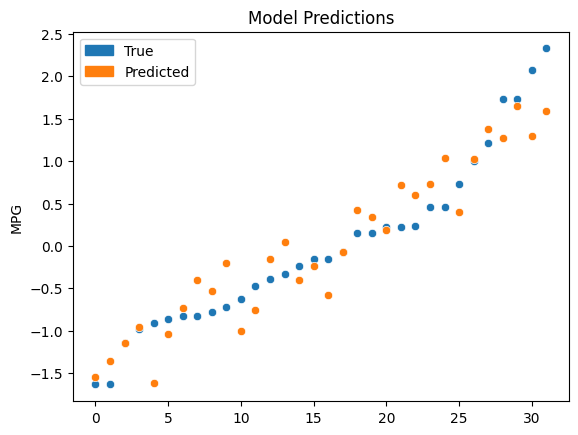

In [74]:
ax = sns.scatterplot(data=df_sort, x=df.index, y='mpg')
sns.scatterplot(ax=ax, data=df_sort, x=df.index, y='greedy_pred_mpg')

ax.set_xlabel(None)
ax.set_ylabel("MPG")
ax.set_title("Model Predictions")

ax.legend(handles=[
    mpatches.Patch(color='tab:blue', label='True'),
    mpatches.Patch(color='tab:orange', label='Predicted')
])

plt.show()

In [66]:
residuals = df_sort['mpg'] - df_sort['greedy_pred_mpg']

In [2]:
plt.scatter(df_sort.index, residuals)

ax = plt.gca()
xlims = ax.get_xlim()

plt.plot([-10, 50], [0, 0], 'red')

ax.set_xlim(xlims)
ax.set_ylim((-2.175, 2.175))

plt.ylabel('Deviation')
plt.title('Residuals')

plt.show()

NameError: name 'df_sort' is not defined

In [68]:
def boostrap(df: pd.DataFrame, n: int) -> pd.DataFrame: 
    return df.iloc[np.random.randint(df.shape[0], size=n)]

In [69]:
cdf = df.drop('greedy_pred_mpg', axis='columns')

In [70]:
boot = boostrap(cdf, 32)
X = boot.drop('mpg', axis='columns')
y = boot['mpg']

In [71]:
def boot_estimates(df: pd.DataFrame, n: int):
    est = { varname: list() for varname in df.columns if varname != 'mpg' }
    lr = LinearRegression()

    for _ in range(n):
        boot = boostrap(df, 32)
        X = boot.drop('mpg', axis='columns')
        y = boot['mpg']

        lr.fit(X, y)
        for label, coef in zip(lr.feature_names_in_, lr.coef_):
            est[label].append(coef)

    
    return est


In [72]:
est = boot_estimates(cdf, 1000)
boot_df = pd.DataFrame.from_dict(est, orient='index').transpose()

In [73]:
boot_df.mean().sort_values()

wt     -0.602675
hp     -0.142044
carb   -0.098585
vs     -0.050203
cyl     0.052079
drat    0.162156
disp    0.266080
gear    0.267049
qsec    0.378210
am      0.386266
dtype: float64